In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/Shareddrives/C2ST_CommunityCorpsW21/deliverables/notebooks/c2st_data_files/'

Mounted at /content/drive
/content/drive/Shareddrives/C2ST_CommunityCorpsW21/deliverables/notebooks/c2st_data_files


In [ ]:
events = pd.read_csv('all_events.csv')
events.tail(10)

,event_no,title,url,date,day_of_week,start_time,end_time,location,eventbrite_url,third_party_url,primary_series,secondary_series,description
305,306,The Art & Science of Distilling with Dr. Rober...,https://www.c2st.org/event/the-art-science-of-...,2021-03-27,Saturday,5:00pm,6:00pm,Facebook Live and C2ST YouTube TV,https://www.eventbrite.com/e/the-art-science-o...,NaN,Science and Society,NaN,"On International Whiskey Day, join C2ST and KO..."
306,307,"Mental Help: Impacts of Isolation, Racism, and...",https://www.c2st.org/event/mental-help-impacts...,2021-03-29,Monday,11:00am,12:00am,NaN,https://www.eventbrite.com/e/mental-help-impac...,NaN,Health and Wellness,Science and Society,Dr. Jaleel Abdul-Adil (University of Illinois)...
307,308,Science and Sandwiches featuring Jeanette Bart...,https://www.c2st.org/event/science-and-sandwic...,2021-04-02,Friday,12:15pm,12:45pm,Virtual,https://www.eventbrite.com/e/science-and-sandw...,NaN,Science and Society,Technology and Engineering,Join C2ST and Dr. Jeanette Bartley for our mon...
308,309,Nanoengineered Materials and Thermal Engineeri...,https://www.c2st.org/event/nanoengineered-mate...,2021-04-14,Wednesday,3:30pm,4:45pm,Illinois Tech YouTube Channel,NaN,https://www.youtube.com/watch?v=yqGb5NfthIA,Technology and Engineering,NaN,This program is part of the IIT Distinguished ...
309,310,A Window into Science 2021,https://www.c2st.org/event/a-window-into-scien...,2021-04-15,Thursday,4:00pm,NaN,Virtual,https://www.eventbrite.com/e/a-window-into-sci...,NaN,NaN,NaN,You are cordially invited to “A Window Into Sc...
310,311,Working Together to Keep the Lakes Great,https://www.c2st.org/event/working-together-to...,2021-04-29,Thursday,5:00pm,6:00pm,Facebook Live and C2ST YouTube TV,https://www.eventbrite.com/e/working-together-...,NaN,"Climate, Energy, and Environment",Science and Society,Here’s a trivia question: what contains 20% of...
311,312,Here to There: The History & Future of Chicago...,https://www.c2st.org/event/here-to-there-the-h...,2021-05-03,Monday,5:00pm,6:00pm,Facebook Live and C2ST YouTube TV,https://www.eventbrite.com/e/here-to-there-the...,NaN,"Climate, Energy, and Environment",Technology and Engineering,Chicago has a rich history of public transport...
312,313,Science and Sandwiches featuring Darion Crawford,https://www.c2st.org/event/science-and-sandwic...,2021-05-07,Friday,12:15pm,12:45pm,Zoom,https://www.eventbrite.com/e/science-and-sandw...,NaN,Life Science,Science and Society,Join C2ST and Darion Crawford for our monthly ...
313,314,Mental Help: Impacts of Loneliness & Social Is...,https://www.c2st.org/event/mental-help-impacts...,2021-05-25,Tuesday,5:00pm,6:00pm,Facebook Live and C2ST YouTube TV,https://www.eventbrite.com/e/mental-help-impac...,NaN,Health and Wellness,Science and Society,Approximately one-quarter of community-dwellin...
314,315,Building Equity: Sustaining BIPOC in STEM,https://www.c2st.org/event/building-equity-sus...,2021-06-10,Thursday,4:00pm,4:45pm,Facebook Live and C2ST YouTube TV,https://www.eventbrite.com/e/building-equity-s...,NaN,NaN,NaN,Dr. Ruby Mendenhall and Students from Perspect...


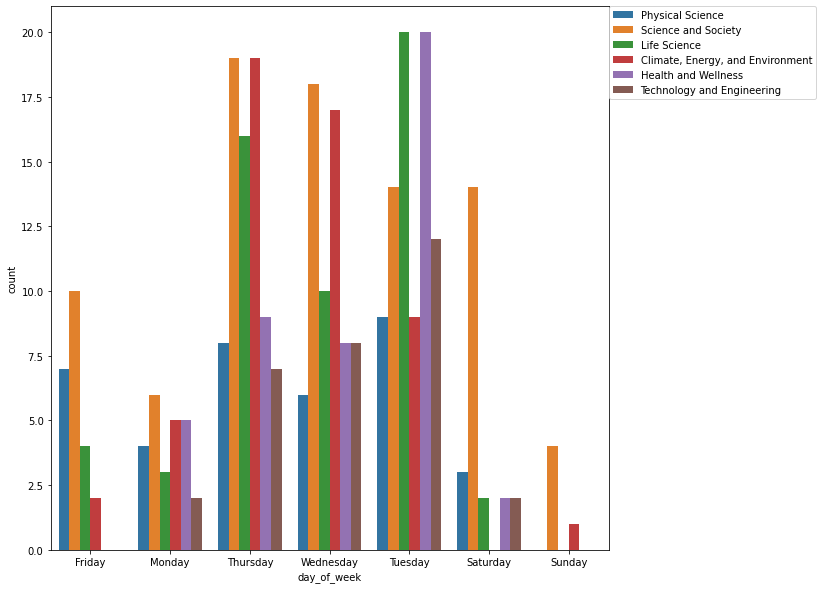

In [ ]:
fig1 , ax1 = plt.subplots(figsize=(10,10))
ax1 = sns.countplot(data=events, x='day_of_week', hue='primary_series')
ax1.legend(bbox_to_anchor=(1,1), loc=2, borderaxespad=0)

In [ ]:
c2storg = pd.read_excel('/content/master_webdata_file.xlsx', sheet_name='c2st_org')
eventbrite = pd.read_excel('/content/master_webdata_file.xlsx', sheet_name='eventbrite')
youtube = pd.read_excel('/content/master_webdata_file.xlsx', sheet_name='youtube')

In [ ]:
eventbrite.shape

(24, 5)

In [ ]:
events_merged = pd.merge(events, c2storg, how='inner', on='event_no')
events_merged = pd.merge(events_merged, youtube, how='inner', on='event_no')
events_merged['title_len'] = events_merged.title.apply(len)
events_merged['weekday_num'] = events_merged.day_of_week.replace(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], [1, 2, 3, 4, 5, 6, 7])
events_merged['series_num'] = events_merged.primary_series.replace(['Physical Science', 'Science and Society', 'Life Science', 'Climate, Energy, and Environment', 'Health and Wellness', 'Technology and Engineering'],
                                                                [1, 2, 3, 4, 5, 6])
events_merged.head()

,event_no,title,url,date,day_of_week,start_time,end_time,location,eventbrite_url,third_party_url,primary_series,secondary_series,description,c2st_event_page_title,pageviews,avg_time_on_page,bounce_rate,lev_dist_x,yt_video_title,views,percent_change,lev_dist_y,title_len,weekday_num,series_num
0,22,Hubble’s Story,https://www.c2st.org/event/hubbles-story-2/,2009-10-28,Wednesday,NaN,NaN,"School of the Art Institute of Chicago, SAIC B...",NaN,NaN,Physical Science,NaN,"In May 2009, NASA astronaut and University of ...",Hubble's Story | The Chicago Council on Scienc...,1,NaN,1.0,90,Hubble's Story - John Grunsfeld,1,0.000000,90,14,3,1
1,58,FRACKING – the quest for energy independence,https://www.c2st.org/event/fracking-the-quest-...,2012-01-19,Thursday,NaN,NaN,"Northwestern University, Chicago Campus, Hughe...",NaN,NaN,"Climate, Energy, and Environment",NaN,Abstract: \nFracking is a step in the producti...,FRACKING - the quest for energy independence |...,3,165.0,0.5,90,FRACKING - the quest for energy independence -...,1,NaN,90,44,4,4
2,58,FRACKING – the quest for energy independence,https://www.c2st.org/event/fracking-the-quest-...,2012-01-19,Thursday,NaN,NaN,"Northwestern University, Chicago Campus, Hughe...",NaN,NaN,"Climate, Energy, and Environment",NaN,Abstract: \nFracking is a step in the producti...,FRACKING – the quest for energy independence |...,2,NaN,1.0,90,FRACKING - the quest for energy independence -...,1,NaN,90,44,4,4
3,65,CERN: What’s it all about?,https://www.c2st.org/event/cern-whats-it-all-a...,2012-05-01,Tuesday,NaN,NaN,"Chicago Club, Mezzanine leve",NaN,NaN,Physical Science,NaN,Abstract: \nSome scientists believe that the H...,CERN: What’s it all about? | The Chicago Counc...,1,NaN,1.0,90,CERN: What's it all about? 5/1/12 - Young- Kee...,4,-0.636364,90,26,2,1
4,76,"Bioluminescence: Living Lights, Lights for Living",https://www.c2st.org/event/bioluminescence-liv...,2013-02-21,Thursday,NaN,NaN,"McDermot, Will & Emery",NaN,NaN,Life Science,NaN,Bioluminescence is everywhere on earth—most of...,"Bioluminescence: Living Lights, Lights for Liv...",2,NaN,1.0,90,"Bioluminescence: Living Lights, Lights for Liv...",13,1.166667,90,49,4,3


In [ ]:
events_df = events_merged[['event_no', 'title_len', 'date', 'weekday_num', 'start_time', 'end_time', 'location', 'series_num', 'pageviews', 'bounce_rate', 'views']]
events_df

,event_no,title_len,date,weekday_num,start_time,end_time,location,series_num,pageviews,bounce_rate,views
0,22,14,2009-10-28,3,NaN,NaN,"School of the Art Institute of Chicago, SAIC B...",1,1,1.000000,1
1,58,44,2012-01-19,4,NaN,NaN,"Northwestern University, Chicago Campus, Hughe...",4,3,0.500000,1
2,58,44,2012-01-19,4,NaN,NaN,"Northwestern University, Chicago Campus, Hughe...",4,2,1.000000,1
3,65,26,2012-05-01,2,NaN,NaN,"Chicago Club, Mezzanine leve",1,1,1.000000,4
4,76,49,2013-02-21,4,NaN,NaN,"McDermot, Will & Emery",3,2,1.000000,13
...,...,...,...,...,...,...,...,...,...,...,...
62,302,49,2021-03-01,1,4:00pm,5:00pm,Facebook Live and C2ST YouTube TV,5,1,1.000000,8
63,304,32,2021-03-11,4,4:00pm,4:45pm,Facebook Live and C2ST YouTube TV,5,2,0.500000,4
64,305,54,2021-03-22,1,12:00pm,1:00pm,Facebook Live and C2ST YouTube TV,5,1,1.000000,17
65,306,57,2021-03-27,6,5:00pm,6:00pm,Facebook Live and C2ST YouTube TV,2,1,1.000000,78


In [ ]:
events_dfna = events_df.isna()
events_dfna[events_dfna['start_time'] == True].shape # 26/67
events_dfna[events_dfna['end_time'] == True].shape # 26/67
event_features = events_df.drop(['date', 'start_time', 'end_time', 'location'], axis=1)


,event_no,title_len,date,weekday_num,start_time,end_time,location,series_num,pageviews,bounce_rate,views
0,False,False,False,False,True,True,False,False,False,False,False
1,False,False,False,False,True,True,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False,False,False
3,False,False,False,False,True,True,False,False,False,False,False
4,False,False,False,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
62,False,False,False,False,False,False,False,False,False,False,False
63,False,False,False,False,False,False,False,False,False,False,False
64,False,False,False,False,False,False,False,False,False,False,False
65,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
features_na = event_features.isna()
features_na[features_na['bounce_rate'] == True]


,event_no,title_len,weekday_num,series_num,pageviews,bounce_rate,views
48,False,False,False,False,False,True,False
54,False,False,False,False,False,True,False
58,False,False,False,False,False,True,False
61,False,False,False,False,False,True,False


In [ ]:
event_features.fillna(value=0, inplace=True)

In [ ]:
event_features.describe()

,event_no,title_len,weekday_num,series_num,pageviews,bounce_rate,views
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,209.298507,44.343284,3.164179,3.298507,5.149254,0.804860,16.970149
std,72.457723,18.534613,1.286256,1.557143,8.290655,0.346413,34.139629
min,22.000000,14.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,161.000000,28.000000,2.000000,2.000000,1.000000,0.738636,1.500000
50%,217.000000,44.000000,3.000000,3.000000,2.000000,1.000000,4.000000
75%,276.500000,59.000000,4.000000,5.000000,4.000000,1.000000,14.000000
max,307.000000,76.000000,6.000000,6.000000,44.000000,1.000000,220.000000


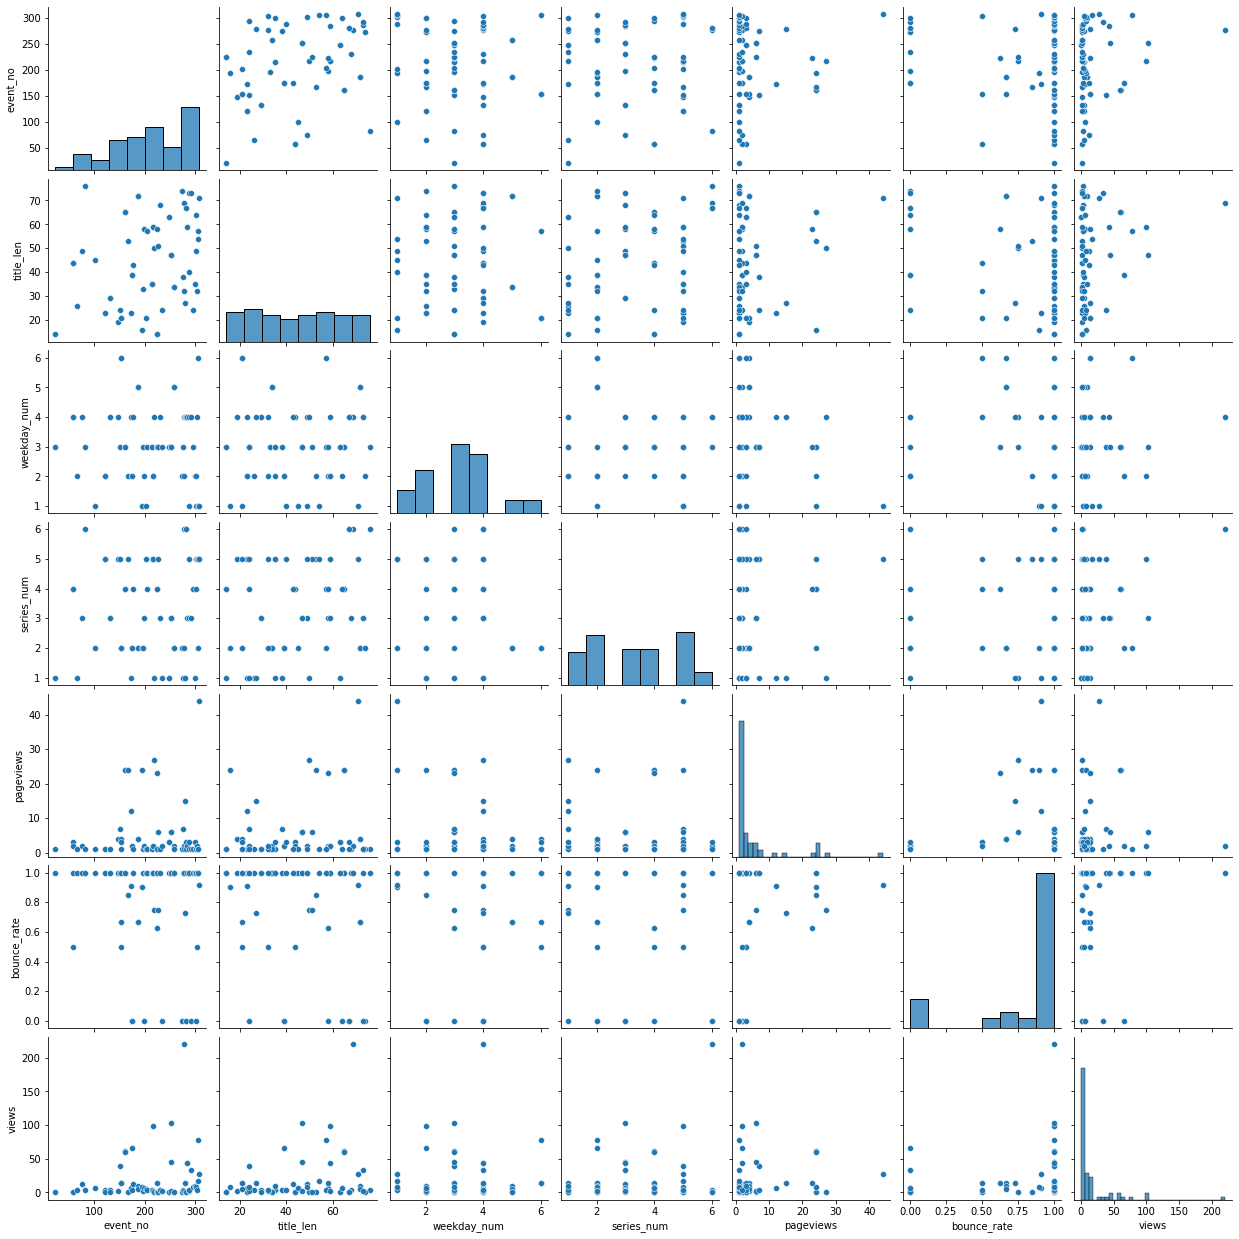

In [ ]:
event_features_pairplot = sns.pairplot(event_features)
event_features_pairplot.savefig('feature_pairplot.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


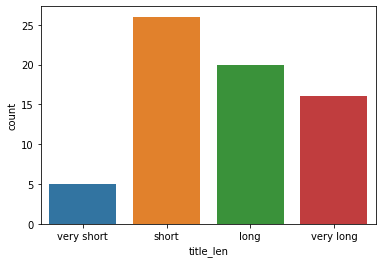

In [ ]:
len_bins = (0, 20, 40, 60, 80)
len_cat_names = ['very short', 'short', 'long', 'very long']
len_cats = pd.cut(event_features.title_len, len_bins, labels=len_cat_names)
sns.countplot(len_cats)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


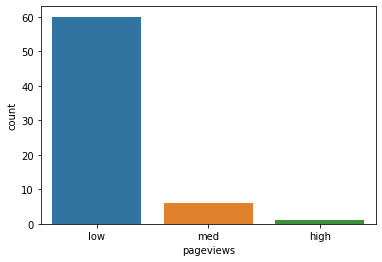

In [ ]:
pgview_bins = (0, 15, 30, 45)
pgview_cat_names = ['low', 'med', 'high']
pgview_cats = pd.cut(event_features.pageviews, pgview_bins, labels=pgview_cat_names)
sns.countplot(pgview_cats)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


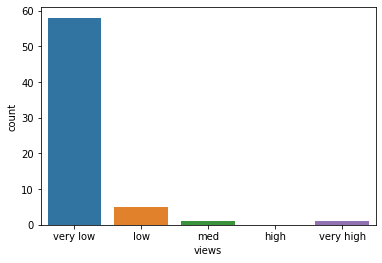

In [ ]:
vidview_bins = (0, 50, 100, 150, 200, 250)
vidview_cat_names = ['very low', 'low', 'med', 'high', 'very high']
vidview_cats = pd.cut(event_features.views, vidview_bins, labels=vidview_cat_names)
sns.countplot(vidview_cats)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


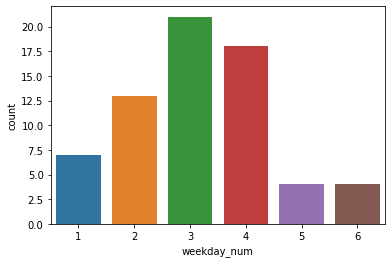

In [ ]:
sns.countplot(events_df.weekday_num)
#left to right - monday through sunday

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


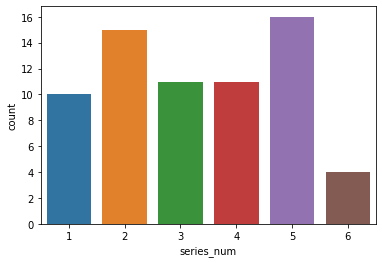

In [ ]:
sns.countplot(events_df.series_num)

In [ ]:
events_merged.shape

(67, 25)

In [ ]:
X = event_features.drop('event_no', axis=1).values
labels = event_features['event_no']
labels.head()

0    22
1    58
2    58
3    65
4    76
Name: event_no, dtype: int64

In [ ]:
def labelled_scatterplot(data=None,x=None,y=None,labs=None):
    p1 = sns.scatterplot(data=data,x=x,y=y)
    for line in range(0,data.shape[0]):
        p1.text(data[x][line]+0.01, data[y][line], 
                data[labs][line], horizontalalignment='left', 
                size='medium', color='black')

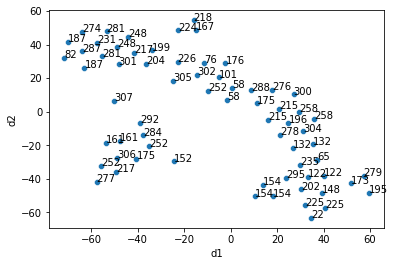

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0, perplexity=15)
X_2d = tsne.fit_transform(X)
tsne_labelled = pd.concat([pd.DataFrame({'event_no':labels}),pd.DataFrame(X_2d,columns=['d1','d2'])],axis=1)

labelled_scatterplot(data=tsne_labelled, x='d1', y='d2', labs='event_no')

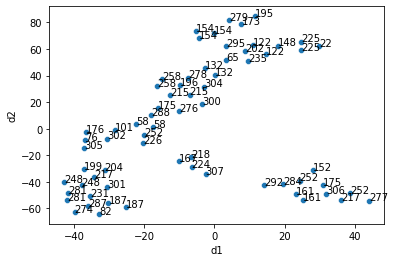

In [ ]:
tsne = TSNE(n_components=2, random_state=0, perplexity=10)
X_2d = tsne.fit_transform(X)
tsne_labelled = pd.concat([pd.DataFrame({'event_no':labels}),pd.DataFrame(X_2d,columns=['d1','d2'])],axis=1)

labelled_scatterplot(data=tsne_labelled, x='d1', y='d2', labs='event_no')